In [5]:
#from geopy.distance import distance

#def calculate_circle_points(center, radius, num_points=10):
#    circle_points = []
#    for i in range(num_points):
#        angle = i * (360 / num_points)
#        point = distance(kilometers=radius).destination(center, angle)
#        circle_points.append((point.longitude, point.latitude))
#    return circle_points

In [2]:
#pip install geopy

     |████████████████████████████████| 125 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 5.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
# pip install shapely

     |████████████████████████████████| 1.4 MB 1.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
import json

def divide_geojson(gdf, center, radius):
    divisions = []

    center_point = Point(center)
    buffer_polygon = center_point.buffer(radius)

    for idx, row in gdf.iterrows():
        polygon = row['geometry']
        intersection = polygon.intersection(buffer_polygon)

        if not intersection.is_empty:
            divisions.append({
                "type": "Feature",
                "geometry": {
                    "type": "Polygon",
                    "coordinates": [list(intersection.exterior.coords)]
                },
                "properties": {}
            })

    divided_geojson = {
        "type": "FeatureCollection",
        "features": divisions
    }

    return divided_geojson

def main():
    # Load the GeoJSON file using geopandas
    geojson_file = '/Users/lydialo/Data Clinic Perpetual/2024-winter-perpetual/data/boundaries/hilo.geojson'
    gdf = gpd.read_file(geojson_file)

    # Define the center point and radius (adjust these values)
    center_point = (-155.555413, 19.503474)
    radius = 0.1  # Adjust the radius as needed

    # Divide the GeoJSON into circular divisions
    divided_geojson = divide_geojson(gdf, center_point, radius)

    # Save the divided GeoJSON to a new file
    with open('divided_geojson.geojson', 'w') as output_file:
        json.dump(divided_geojson, output_file)

if __name__ == "__main__":
    main()

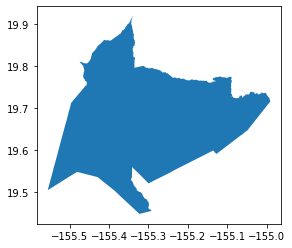

In [15]:
# View of Initial Hilo geojson
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON file
geojson_file = '/Users/lydialo/Data Clinic Perpetual/2024-winter-perpetual/data/boundaries/hilo.geojson'
gdf = gpd.read_file(geojson_file)

# Plot the GeoDataFrame
gdf.plot()
plt.show()

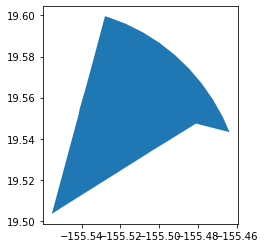

In [32]:
# View of Divided Hilo geojson
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON file
geojson_file = '/Users/lydialo/Data Clinic Perpetual/2024-winter-perpetual/notebooks/divided_geojson.geojson'
gdf = gpd.read_file(geojson_file)

# Plot the GeoDataFrame
#gdf.plot()
gdf.plot()
plt.show()

In [23]:
#pip install folium geopandas

In [33]:
print(gdf.head())

                                            geometry
0  POLYGON ((-155.46384 19.54326, -155.46477 19.5...
